# **Análisis Exploratorio Reto House Price**

## **Librerías**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
#Solo para jupyter y usa su propio backend para las gráficas
import matplotlib.pyplot as plt
import seaborn as sns


## **1. Descripción de datos**

### **1.1. Carga de datos como dataframe**

In [ ]:
df_train = pd.read_csv("train.csv", header=0, index_col=0)
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

### **1.2. Características generales del dataset**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

### **1.3. Conteo e identificación de variables categóricas**

In [ ]:
# Contar cuantas variables numéricas y categóricas hay
num_vars = df_train.select_dtypes(include=['number']).shape[1]
cat_vars = df_train.select_dtypes(include=['object']).shape[1]
print(f'Número de variables numéricas: {num_vars}')
print(f'Número de variables categóricas: {cat_vars}')

Número de variables numéricas: 37
Número de variables categóricas: 43


In [ ]:
# Crear dataframe con los nombres de las variables numéricas y categóricas clasificadas
num_columns = df_train.select_dtypes(include=['number']).columns.tolist()
cat_columns = df_train.select_dtypes(include=['object']).columns.tolist()
variables_df = pd.DataFrame({
    'Numéricas': pd.Series(num_columns),
    'Categóricas': pd.Series(cat_columns)
})
variables_df

Numéricas    Categóricas
0      MSSubClass       MSZoning
1     LotFrontage         Street
2         LotArea          Alley
3     OverallQual       LotShape
4     OverallCond    LandContour
5       YearBuilt      Utilities
6    YearRemodAdd      LotConfig
7      MasVnrArea      LandSlope
8      BsmtFinSF1   Neighborhood
9      BsmtFinSF2     Condition1
10      BsmtUnfSF     Condition2
11    TotalBsmtSF       BldgType
12       1stFlrSF     HouseStyle
13       2ndFlrSF      RoofStyle
14   LowQualFinSF       RoofMatl
15      GrLivArea    Exterior1st
16   BsmtFullBath    Exterior2nd
17   BsmtHalfBath     MasVnrType
18       FullBath      ExterQual
19       HalfBath      ExterCond
20   BedroomAbvGr     Foundation
21   KitchenAbvGr       BsmtQual
22   TotRmsAbvGrd       BsmtCond
23     Fireplaces   BsmtExposure
24    GarageYrBlt   BsmtFinType1
25     GarageCars   BsmtFinType2
26     GarageArea        Heating
27     WoodDeckSF      HeatingQC
28    OpenPorchSF     CentralAir
29  EnclosedPorch     Electrical
30      3SsnPorch    KitchenQual
31    ScreenPorch     Functional
32       PoolArea    FireplaceQu
33        MiscVal     GarageType
34         MoSold   GarageFinish
35         YrSold     GarageQual
36      SalePrice     GarageCond
37            NaN     PavedDrive
38            NaN         PoolQC
39            NaN          Fence
40            NaN    MiscFeature
41            NaN       SaleType
42            NaN  SaleCondition

### **1.4. Estadística descriptiva del dataset**

In [ ]:
df_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

#### **1.4.1. Rangos de valores de las variables**

In [ ]:
pd.set_option('display.max_columns', None)

min_max_mean = df_train.describe().loc[['min', 'max', 'mean']]
min_max_mean

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
min     20.00000    21.000000    1300.000000     1.000000     1.000000   
max    190.00000   313.000000  215245.000000    10.000000     9.000000   
mean    56.89726    70.049958   10516.828082     6.099315     5.575342   

        YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
min   1872.000000   1950.000000     0.000000     0.000000     0.000000   
max   2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   
mean  1971.267808   1984.865753   103.685262   443.639726    46.549315   

        BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
min      0.000000     0.000000   334.000000     0.000000      0.000000   
max   2336.000000  6110.000000  4692.000000  2065.000000    572.000000   
mean   567.240411  1057.429452  1162.626712   346.992466      5.844521   

        GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
min    334.000000      0.000000      0.000000  0.000000  0.000000   
max   5642.000000      3.000000      2.000000  3.000000  2.000000   
mean  1515.463699      0.425342      0.057534  1.565068  0.382877   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
min       0.000000      0.000000      2.000000    0.000000  1900.000000   
max       8.000000      3.000000     14.000000    3.000000  2010.000000   
mean      2.866438      1.046575      6.517808    0.613014  1978.506164   

      GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
min     0.000000     0.000000    0.000000     0.000000        0.00000   
max     4.000000  1418.000000  857.000000   547.000000      552.00000   
mean    1.767123   472.980137   94.244521    46.660274       21.95411   

       3SsnPorch  ScreenPorch    PoolArea       MiscVal     MoSold  \
min     0.000000     0.000000    0.000000      0.000000   1.000000   
max   508.000000   480.000000  738.000000  15500.000000  12.000000   
mean    3.409589    15.060959    2.758904     43.489041   6.321918   

           YrSold     SalePrice  
min   2006.000000   34900.00000  
max   2010.000000  755000.00000  
mean  2007.815753  180921.19589

## **2. Análisis de la variable objetivo**

### **2.1. Distribución y detección de outliers**

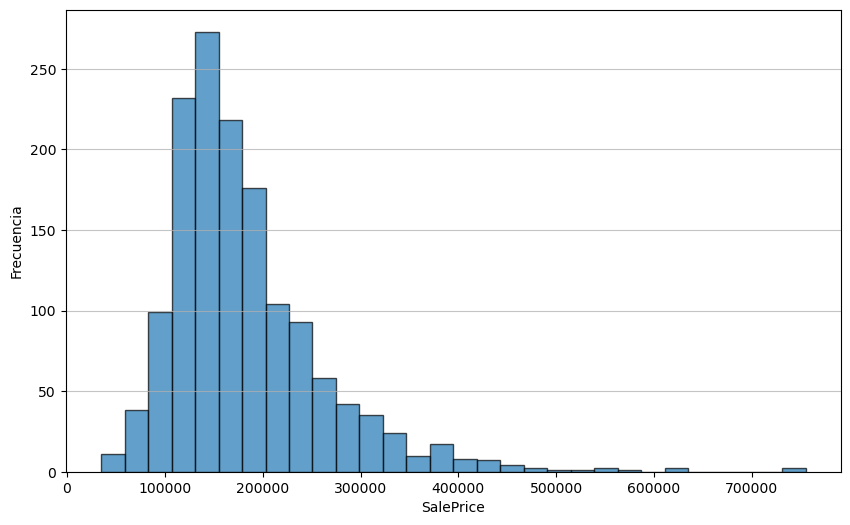

In [ ]:
# Histograma de SalePrice
plt.figure(figsize=(10, 6))
plt.hist(df_train['SalePrice'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

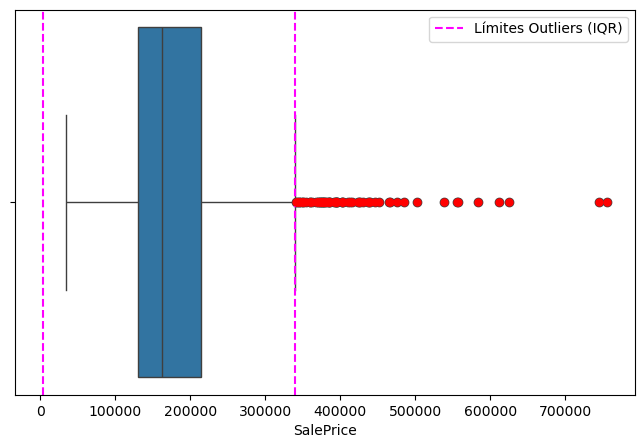

Número de outliers detectados: 61


In [ ]:
# Boxplot de SalePrice seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train['SalePrice'])
plt.xlabel('SalePrice')

# Detección de outliers usando el método IQR
Q1 = df_train['SalePrice'].quantile(0.25)
Q3 = df_train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Graficar los límites de outliers
plt.axvline(lower_bound, color='Magenta', linestyle='--')
plt.axvline(upper_bound, color='Magenta', linestyle='--', label='Límites Outliers (IQR)')
plt.legend()

# Colorear los outliers
outliers = df_train[(df_train['SalePrice'] < lower_bound) | (df_train['SalePrice'] > upper_bound)]
for outlier in outliers['SalePrice']:
    plt.plot(outlier, 0, 'ro', markersize = 5)  # Marca los outliers en rojo

plt.show()

outliersSalePrice = df_train[(df_train['SalePrice'] < lower_bound) | (df_train['SalePrice'] > upper_bound)]
print(f'Número de outliers detectados: {outliersSalePrice.shape[0]}')

### **2.2. Prueba de normalidad**

In [ ]:
# Prueba de normalidad de Jarque-Bera
from scipy.stats import jarque_bera
jb_stat, jb_pvalue = jarque_bera(df_train['SalePrice'])
print(f'Estadístico Jarque-Bera: {jb_stat} \nValor p: {jb_pvalue}')
if jb_pvalue < 0.05:
    print("La distribución de SalePrice NO es normal\n")
else:
    print("La distribución de SalePrice es normal\n")

# Prueba de normalidad de Shapiro-Wilk
from scipy.stats import shapiro
shapiro_stat, shapiro_pvalue = shapiro(df_train['SalePrice'])
print(f'Estadístico Shapiro-Wilk: {shapiro_stat} \nValor p: {shapiro_pvalue}')
if shapiro_pvalue < 0.05:
    print("La distribución de SalePrice NO es normal")
else:
    print("La distribución de SalePrice es normal")


Estadístico Jarque-Bera: 3438.8721241220583 
Valor p: 0.0
La distribución de SalePrice NO es normal

Estadístico Shapiro-Wilk: 0.8696714665902145 
Valor p: 3.2061412312021656e-33
La distribución de SalePrice NO es normal


## **3. Análisis univariado**

### **3.1. Variables numéricas**

#### **3.1.1. Distribuciones y detección de outliers**

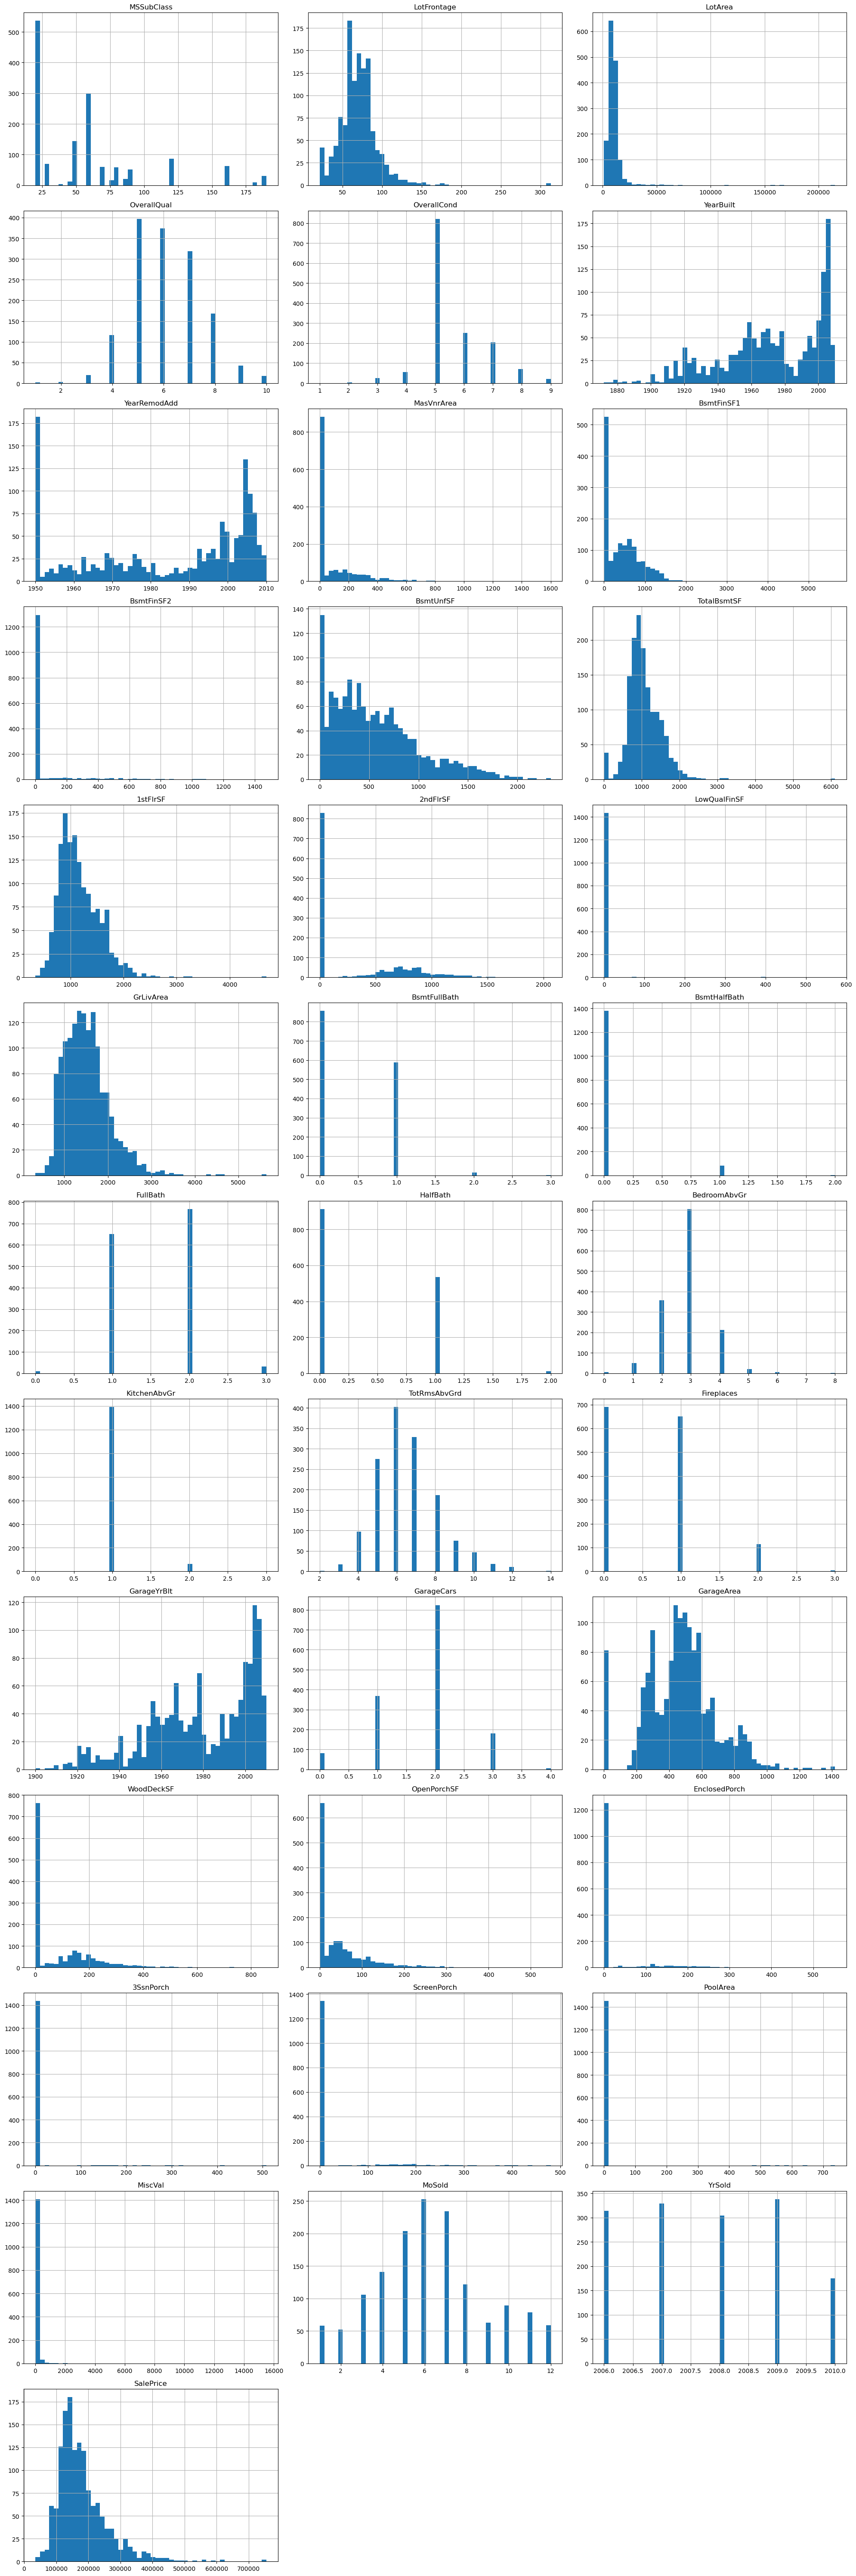

In [ ]:
df_train.hist(bins=50, figsize=(20,60), layout=(int(np.ceil(len(df_train.select_dtypes('number').columns)/3)), 3))
plt.tight_layout()
plt.show()

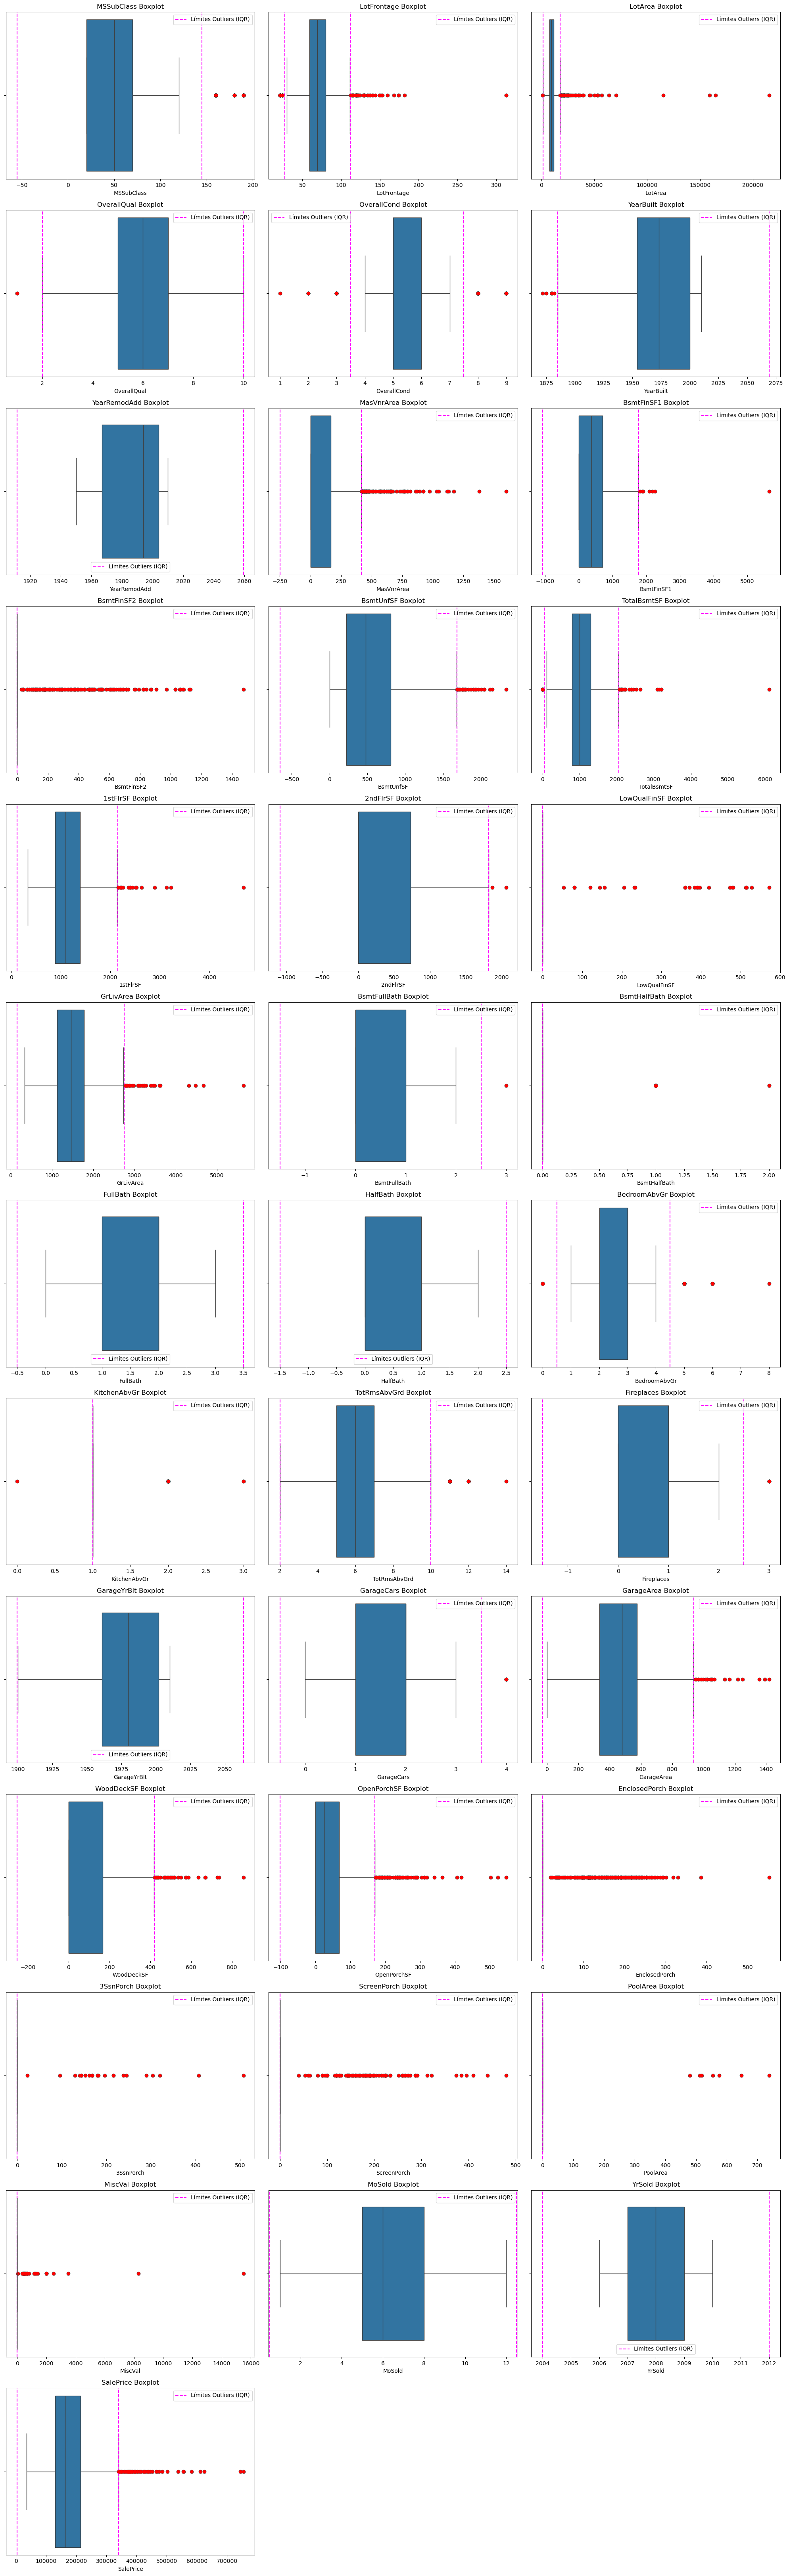

In [ ]:
# Boxplots de cada variable numérica, 3 por fila
num_cols = df_train.select_dtypes(include=['number']).columns
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_xlabel(col)

    # Deteccion de outliers usando el método IQR para cada variable numérica
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    axes[i].axvline(lower_bound, color='Magenta', linestyle='--')
    axes[i].axvline(upper_bound, color='Magenta', linestyle='--', label='Límites Outliers (IQR)')
    axes[i].legend()

    # Colorear los outliers
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    for outlier in outliers[col]:
        axes[i].plot(outlier, 0, 'ro', markersize = 5)# Marca los outliers en rojo


# Elimina los ejes vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()


In [ ]:
# Contar outliers por variable numérica
outlier_counts = {}
for col in num_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Porcentaje de outliers por variable numérica
outlier_percentages = {col: (count / df_train.shape[0]) * 100 for col, count in outlier_counts.items()}

# Crear un DataFrame para mostrar los conteos de outliers y porcentajes
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Variable', 'Número de Outliers'])
outlier_df['Porcentaje de Outliers (%)'] = outlier_percentages.values()
outlier_df = outlier_df.sort_values(by='Número de Outliers', ascending=False)
outlier_df

Variable  Número de Outliers  Porcentaje de Outliers (%)
29  EnclosedPorch                 208                   14.246575
9      BsmtFinSF2                 167                   11.438356
4     OverallCond                 125                    8.561644
31    ScreenPorch                 116                    7.945205
0      MSSubClass                 103                    7.054795
7      MasVnrArea                  96                    6.575342
1     LotFrontage                  88                    6.027397
17   BsmtHalfBath                  82                    5.616438
28    OpenPorchSF                  77                    5.273973
2         LotArea                  69                    4.726027
21   KitchenAbvGr                  68                    4.657534
36      SalePrice                  61                    4.178082
11    TotalBsmtSF                  61                    4.178082
33        MiscVal                  52                    3.561644
20   BedroomAbvGr                  35                    2.397260
27     WoodDeckSF                  32                    2.191781
15      GrLivArea                  31                    2.123288
22   TotRmsAbvGrd                  30                    2.054795
10      BsmtUnfSF                  29                    1.986301
14   LowQualFinSF                  26                    1.780822
30      3SsnPorch                  24                    1.643836
26     GarageArea                  21                    1.438356
12       1stFlrSF                  20                    1.369863
5       YearBuilt                   7                    0.479452
32       PoolArea                   7                    0.479452
8      BsmtFinSF1                   7                    0.479452
25     GarageCars                   5                    0.342466
23     Fireplaces                   5                    0.342466
3     OverallQual                   2                    0.136986
13       2ndFlrSF                   2                    0.136986
16   BsmtFullBath                   1                    0.068493
6    YearRemodAdd                   0                    0.000000
18       FullBath                   0                    0.000000
19       HalfBath                   0                    0.000000
24    GarageYrBlt                   0                    0.000000
34         MoSold                   0                    0.000000
35         YrSold                   0                    0.000000

#### **3.1.2. Pruebas de normalidad**

In [ ]:
# Pruebas de normalidad para cada variable numérica
from scipy.stats import jarque_bera, shapiro
normality_results = {}
for col in num_cols:
    jb_stat, jb_pvalue = jarque_bera(df_train[col])
    shapiro_stat, shapiro_pvalue = shapiro(df_train[col])
    normality_results[col] = {
        'JB p-val': jb_pvalue,
        'SW p-val': shapiro_pvalue
    }

# Crear un DataFrame para mostrar los resultados de las pruebas de normalidad diciendo si es normal o no
# Usamos un umbral de 0.05
for col, results in normality_results.items():
    results['Jarque-Bera Normal'] = 'Sí' if results['JB p-val'] >= 0.05 else 'No'
    results['Shapiro-Wilk Normal'] = 'Sí' if results['SW p-val'] >= 0.05 else 'No'

normality_df = pd.DataFrame(normality_results).T
normality_df

JB p-val SW p-val Jarque-Bera Normal Shapiro-Wilk Normal
MSSubClass          0.0      0.0                 No                  No
LotFrontage         NaN      NaN                 No                  No
LotArea             0.0      0.0                 No                  No
OverallQual    0.002551      0.0                 No                  No
OverallCond         0.0      0.0                 No                  No
YearBuilt           0.0      0.0                 No                  No
YearRemodAdd        0.0      0.0                 No                  No
MasVnrArea          NaN      NaN                 No                  No
BsmtFinSF1          0.0      0.0                 No                  No
BsmtFinSF2          0.0      0.0                 No                  No
BsmtUnfSF           0.0      0.0                 No                  No
TotalBsmtSF         0.0      0.0                 No                  No
1stFlrSF            0.0      0.0                 No                  No
2ndFlrSF            0.0      0.0                 No                  No
LowQualFinSF        0.0      0.0                 No                  No
GrLivArea           0.0      0.0                 No                  No
BsmtFullBath        0.0      0.0                 No                  No
BsmtHalfBath        0.0      0.0                 No                  No
FullBath            0.0      0.0                 No                  No
HalfBath            0.0      0.0                 No                  No
BedroomAbvGr        0.0      0.0                 No                  No
KitchenAbvGr        0.0      0.0                 No                  No
TotRmsAbvGrd        0.0      0.0                 No                  No
Fireplaces          0.0      0.0                 No                  No
GarageYrBlt         NaN      NaN                 No                  No
GarageCars          0.0      0.0                 No                  No
GarageArea          0.0      0.0                 No                  No
WoodDeckSF          0.0      0.0                 No                  No
OpenPorchSF         0.0      0.0                 No                  No
EnclosedPorch       0.0      0.0                 No                  No
3SsnPorch           0.0      0.0                 No                  No
ScreenPorch         0.0      0.0                 No                  No
PoolArea            0.0      0.0                 No                  No
MiscVal             0.0      0.0                 No                  No
MoSold         0.000028      0.0                 No                  No
YrSold              0.0      0.0                 No                  No
SalePrice           0.0      0.0                 No                  No

### **3.2. Variables categóricas**

C:\Users\Ame Contreras\AppData\Local\Temp\ipykernel_18564\1080459121.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_train[col], order=df_train[col].value_counts().index, palette='magma', ax=ax)
C:\Users\Ame Contreras\AppData\Local\Temp\ipykernel_18564\1080459121.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_train[col], order=df_train[col].value_counts().index, palette='magma', ax=ax)
C:\Users\Ame Contreras\AppData\Local\Temp\ipykernel_18564\1080459121.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_trai

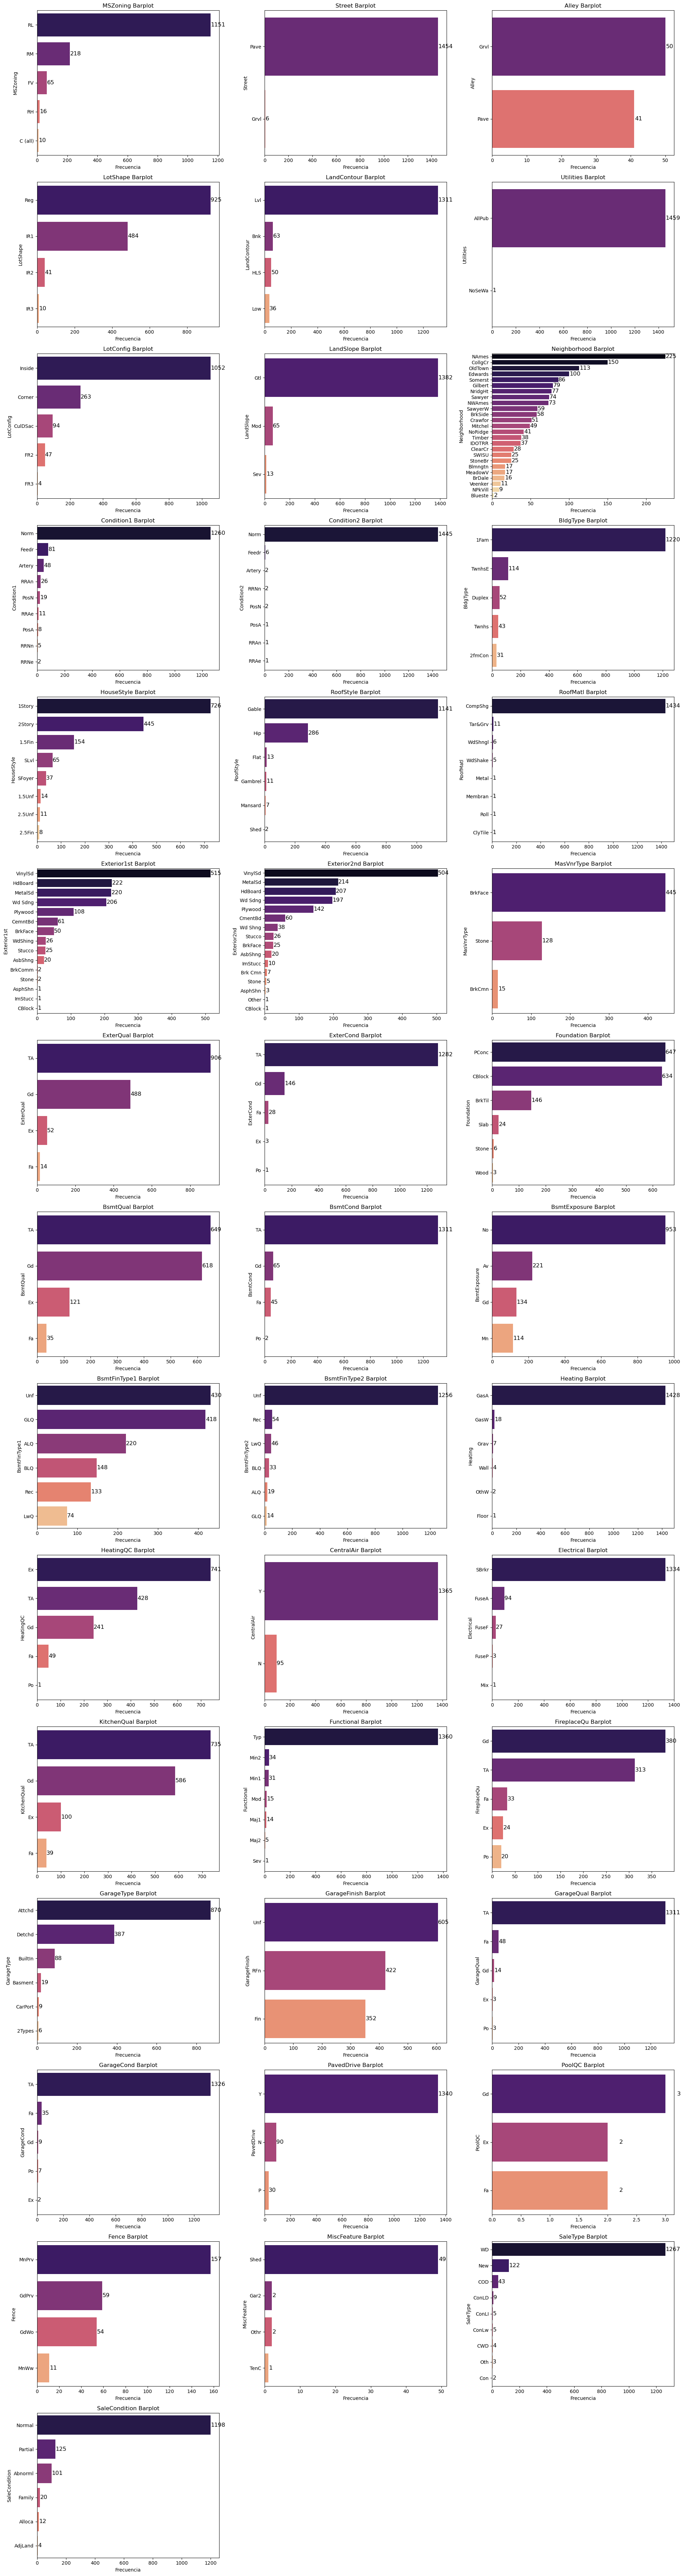

In [ ]:
# Barplots de cada variable categórica, 3 por fila
cat_cols = df_train.select_dtypes(include=['object']).columns
n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(y=df_train[col], order=df_train[col].value_counts().index, palette='magma', ax=ax)
    ax.set_title(f'{col} Barplot')
    ax.set_xlabel('Frecuencia')
    ax.set_ylabel(col)

    # Agrega el conteo al final de cada barra si hay pocos datos
    for p in ax.patches:
        count = int(p.get_width())
        ax.text(p.get_width() + 0.2, p.get_y() + p.get_height()/2, str(count),
        va='center', color='black', fontsize = 12)

# Elimina los ejes vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Dataframe con la categoría más frecuente y la menos frecuente de cada variable categórica
most_frequent = {col: df_train[col].mode()[0] for col in cat_cols}
least_frequent = {col: df_train[col].value_counts().idxmin() for col in cat_cols}

frequency_df = pd.DataFrame({
    'Variable': list(cat_cols),
    'Categoría Más Frecuente': [most_frequent[col] for col in cat_cols],
    'Categoría Menos Frecuente': [least_frequent[col] for col in cat_cols]
})

frequency_df

Variable Categoría Más Frecuente Categoría Menos Frecuente
0        MSZoning                      RL                   C (all)
1          Street                    Pave                      Grvl
2           Alley                    Grvl                      Pave
3        LotShape                     Reg                       IR3
4     LandContour                     Lvl                       Low
5       Utilities                  AllPub                    NoSeWa
6       LotConfig                  Inside                       FR3
7       LandSlope                     Gtl                       Sev
8    Neighborhood                   NAmes                   Blueste
9      Condition1                    Norm                      RRNe
10     Condition2                    Norm                      PosA
11       BldgType                    1Fam                    2fmCon
12     HouseStyle                  1Story                    2.5Fin
13      RoofStyle                   Gable                      Shed
14       RoofMatl                 CompShg                     Metal
15    Exterior1st                 VinylSd                   AsphShn
16    Exterior2nd                 VinylSd                     Other
17     MasVnrType                 BrkFace                    BrkCmn
18      ExterQual                      TA                        Fa
19      ExterCond                      TA                        Po
20     Foundation                   PConc                      Wood
21       BsmtQual                      TA                        Fa
22       BsmtCond                      TA                        Po
23   BsmtExposure                      No                        Mn
24   BsmtFinType1                     Unf                       LwQ
25   BsmtFinType2                     Unf                       GLQ
26        Heating                    GasA                     Floor
27      HeatingQC                      Ex                        Po
28     CentralAir                       Y                         N
29     Electrical                   SBrkr                       Mix
30    KitchenQual                      TA                        Fa
31     Functional                     Typ                       Sev
32    FireplaceQu                      Gd                        Po
33     GarageType                  Attchd                    2Types
34   GarageFinish                     Unf                       Fin
35     GarageQual                      TA                        Ex
36     GarageCond                      TA                        Ex
37     PavedDrive                       Y                         P
38         PoolQC                      Gd                        Ex
39          Fence                   MnPrv                      MnWw
40    MiscFeature                    Shed                      TenC
41       SaleType                      WD                       Con
42  SaleCondition                  Normal                   AdjLand

## **4. Análisis Bivariado**

### **4.1. Correlaciones**

#### **4.1.1.Variables predictoras**

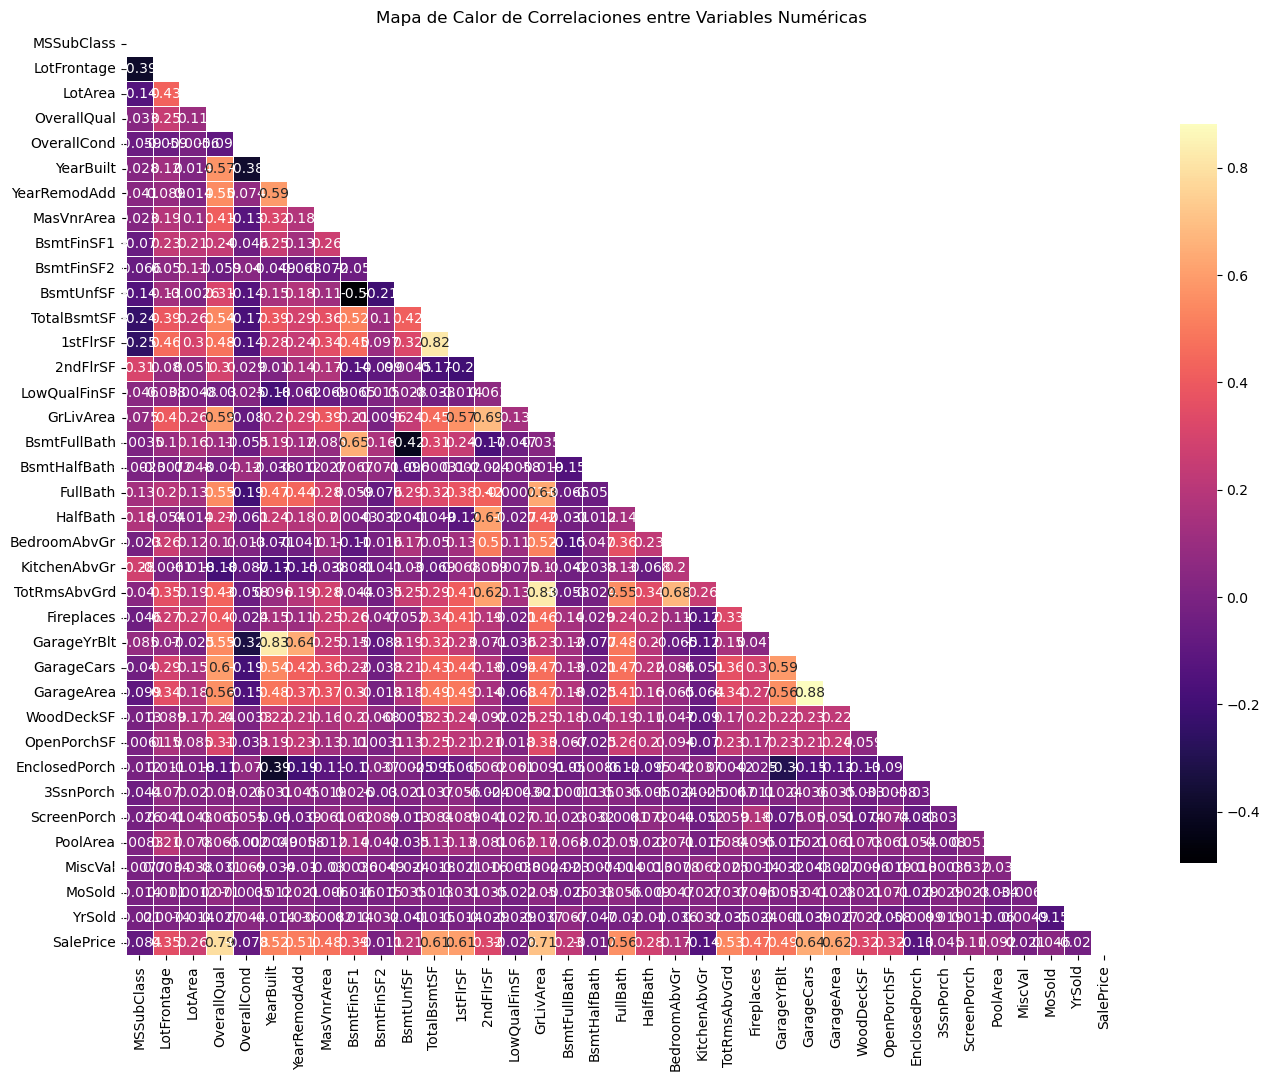

In [ ]:
# Heatmap de todas las correlaciones entre todas las variables sin relaciones duplicadas
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(df_train.corr(numeric_only=True), dtype=bool))
sns.heatmap(df_train.corr(numeric_only=True), mask=mask, annot=True, cmap='magma', cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

#### **4.1.2. SalePrice y Variables**

In [ ]:
correlaciones = df_train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(correlaciones)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


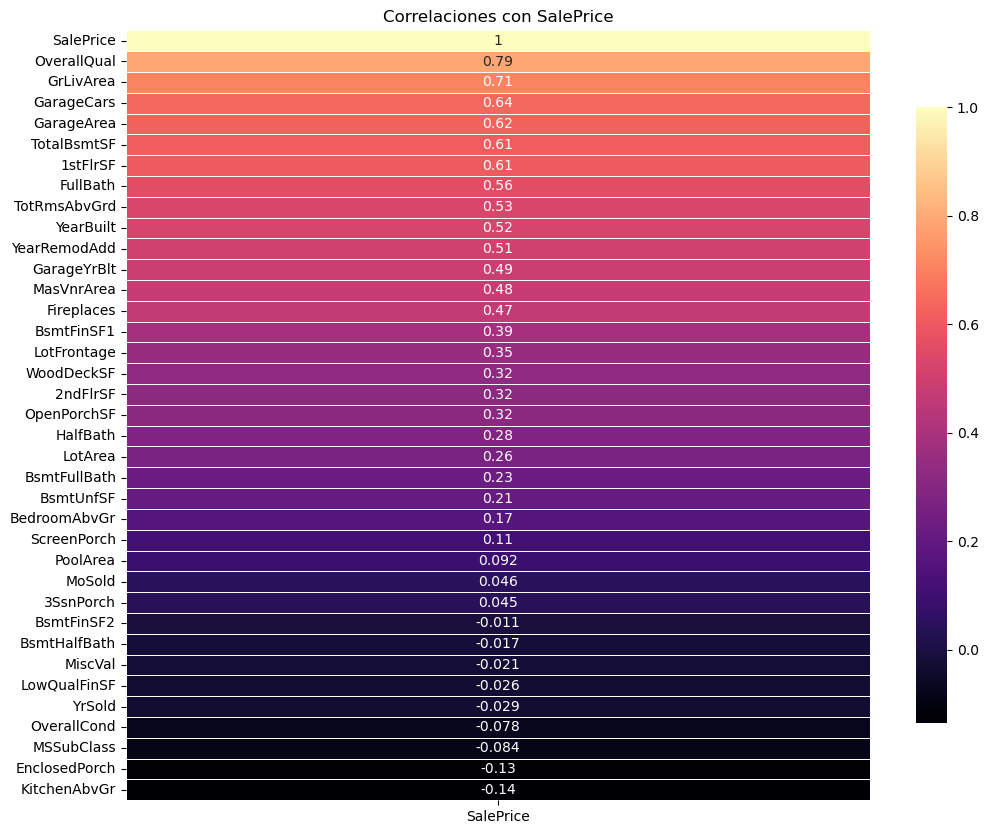

In [ ]:
# Heatmap de todas las correlaciones con SalePrice
plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones.to_frame(), annot=True, cmap='magma', cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlaciones con SalePrice')
plt.show()


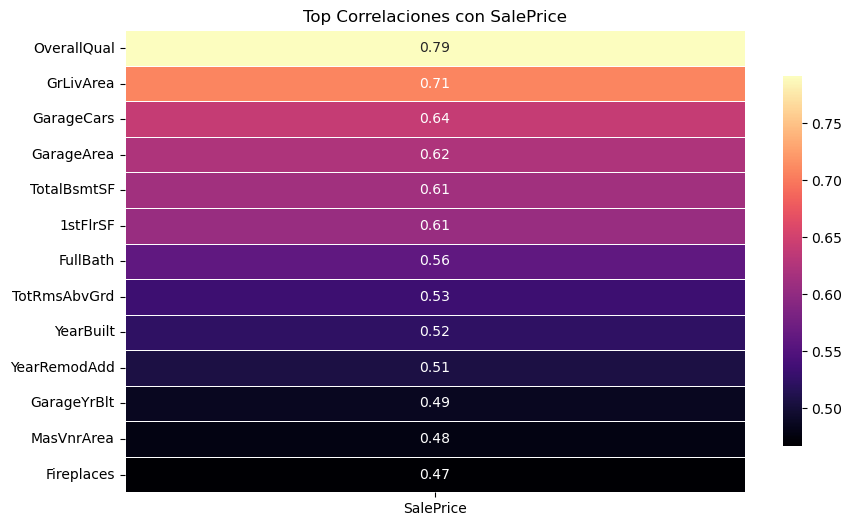

In [ ]:
# Heatmap de las correlaciones mas altas con SalePrice
plt.figure(figsize=(10, 6))
top_corr = correlaciones[1:14]  # Excluye SalePrice consigo mismo
sns.heatmap(top_corr.to_frame(), annot=True, cmap='magma', cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Top Correlaciones con SalePrice')
plt.show()

In [ ]:
# Calcula la correlación de cada columna de porch_cols con SalesPrice
porch_cols = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
correlaciones_porch = df_train[porch_cols + ['SalePrice']].corr()['SalePrice'].drop('SalePrice')
print(correlaciones_porch)

OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
Name: SalePrice, dtype: float64


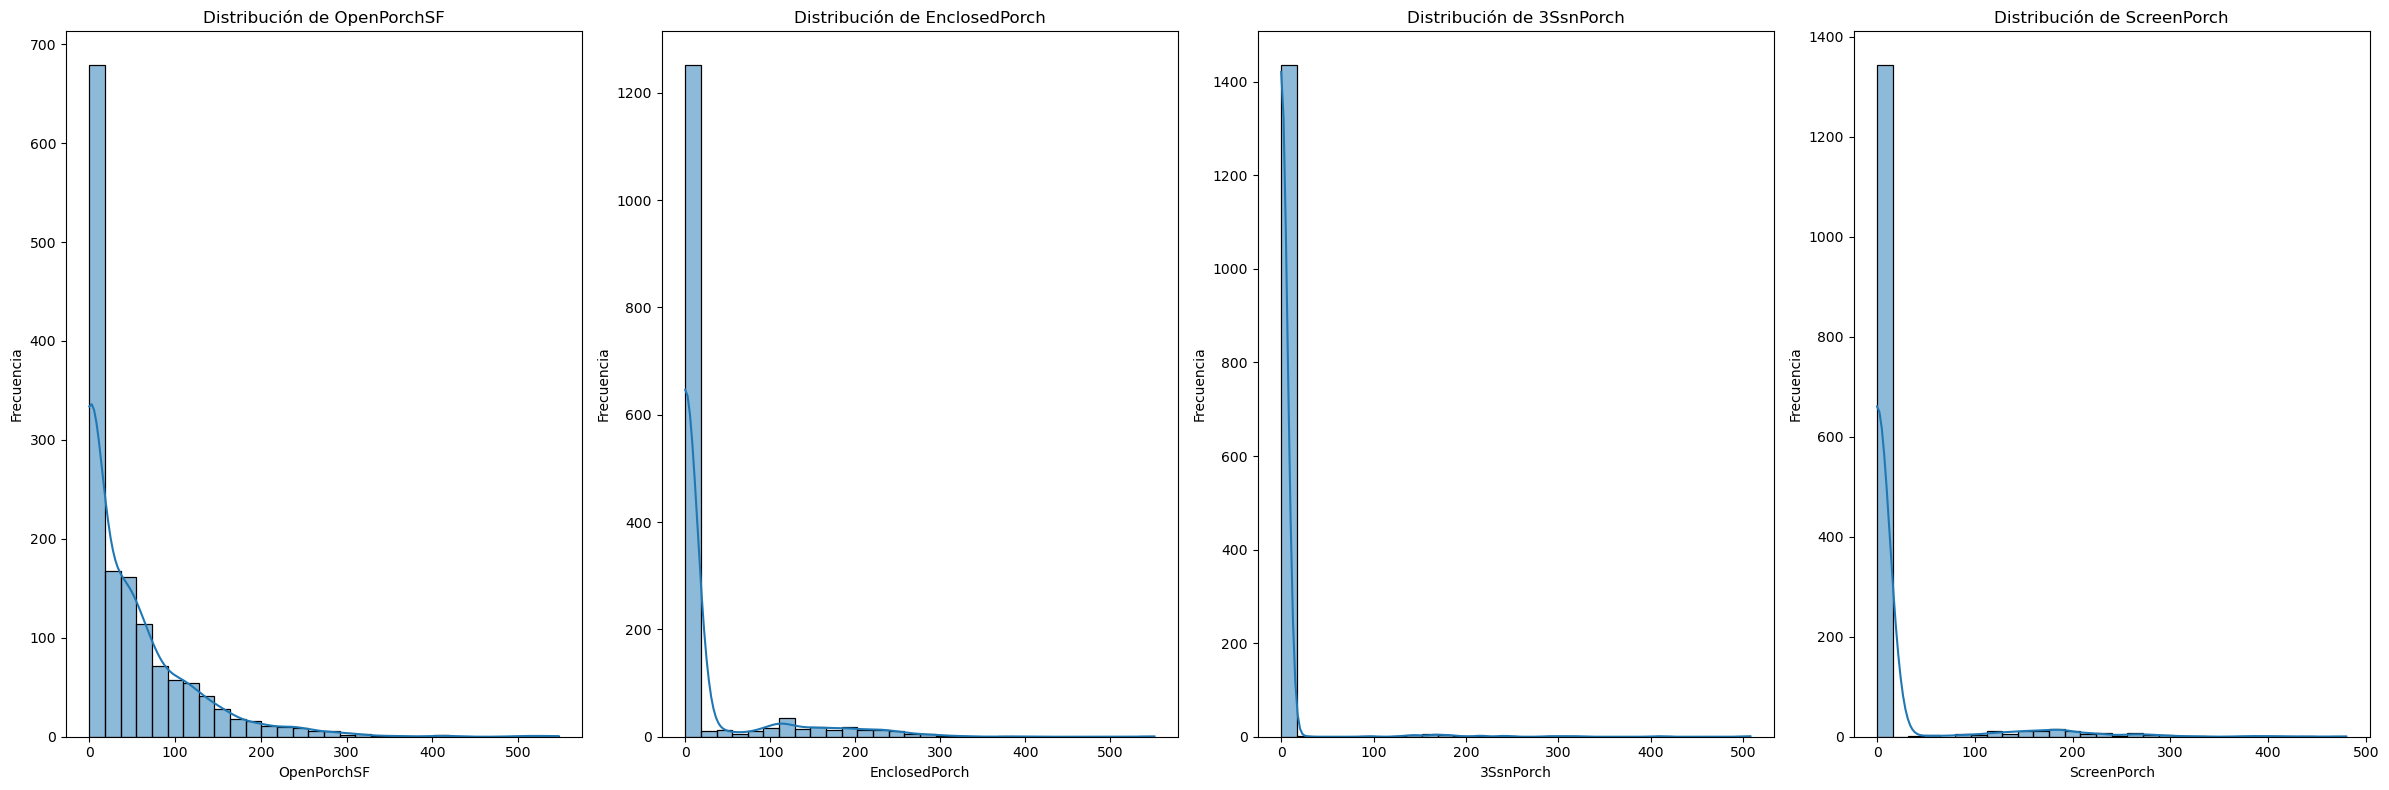

In [ ]:
# Histogramas de porch_cols en la misma línea
fig, axes = plt.subplots(1, 4, figsize=(24, 8))
for i, col in enumerate(porch_cols):
    sns.histplot(df_train[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

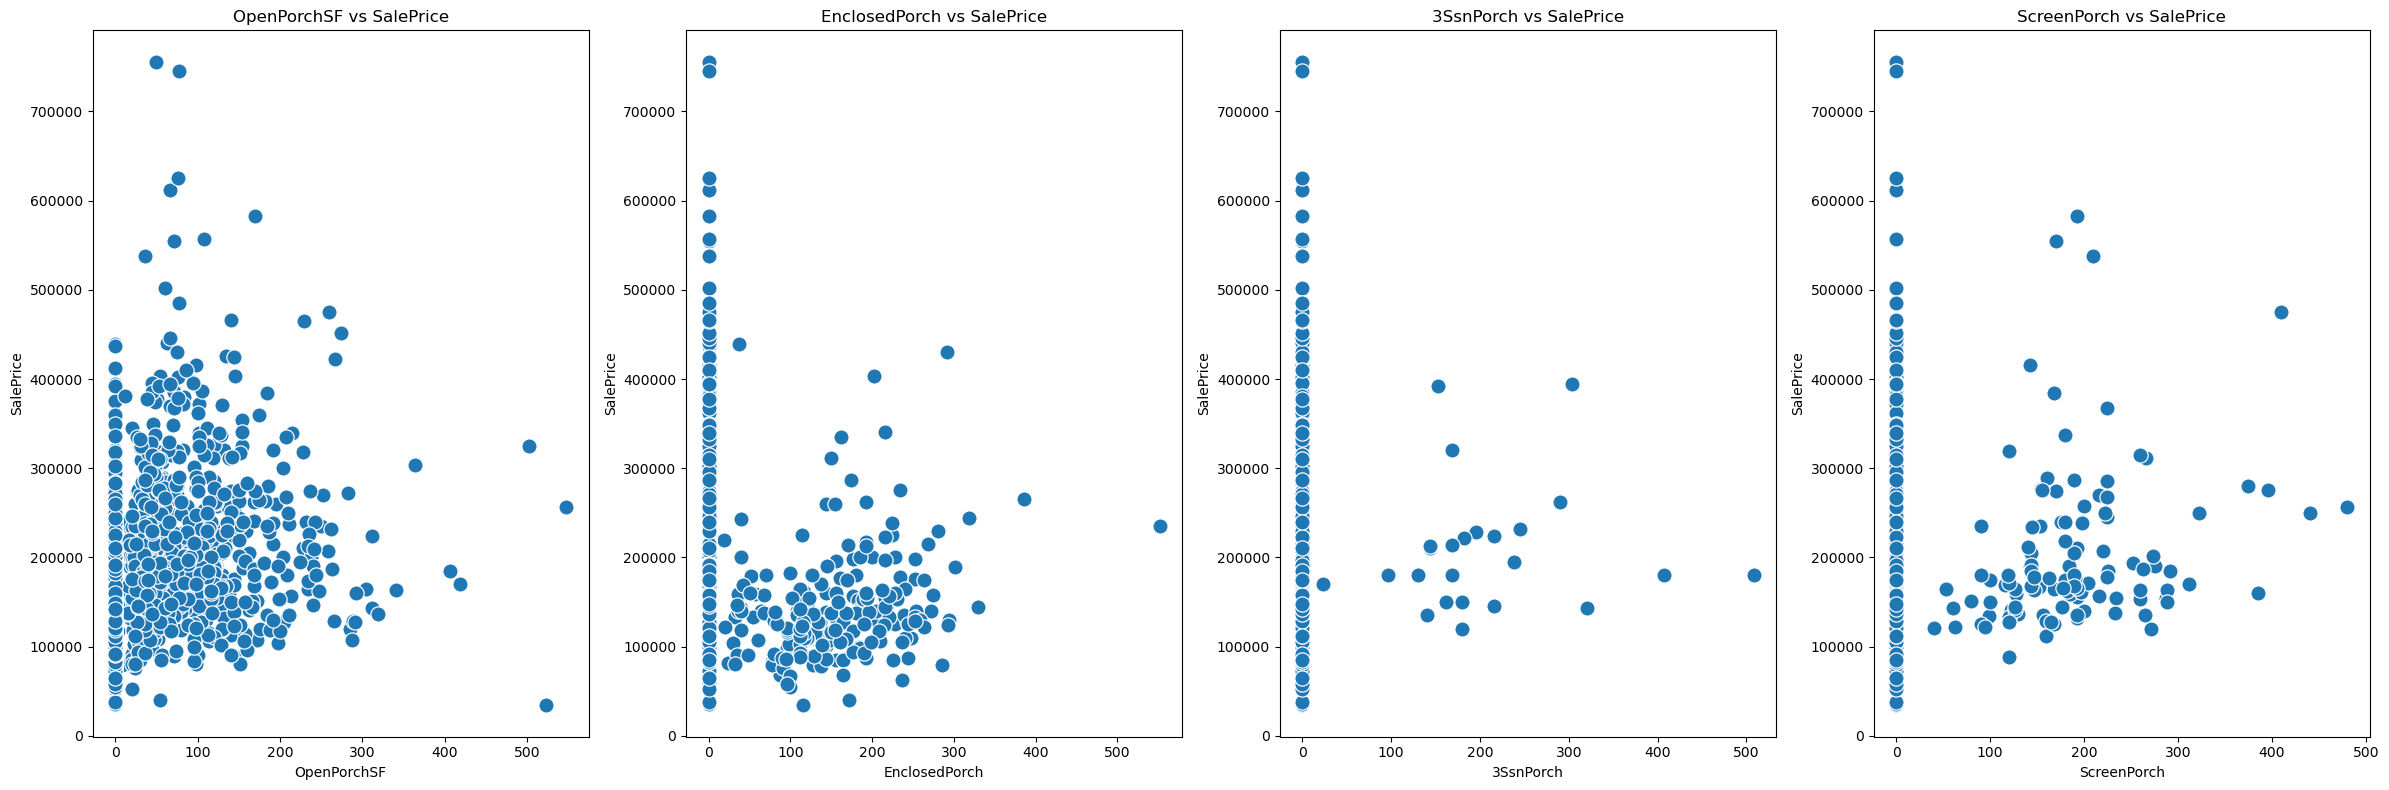

In [ ]:
# Scatterplots de porch_cols con SalePrice
fig, axes = plt.subplots(1, 4, figsize=(24, 8))
for i, col in enumerate(porch_cols):
    sns.scatterplot(data=df_train, x=col, y='SalePrice', ax=axes[i], markers='o', s=120)
    axes[i].set_title(f'{col} vs SalePrice')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

### **4.2. Relaciones SalePrice VS Variables predictoras**

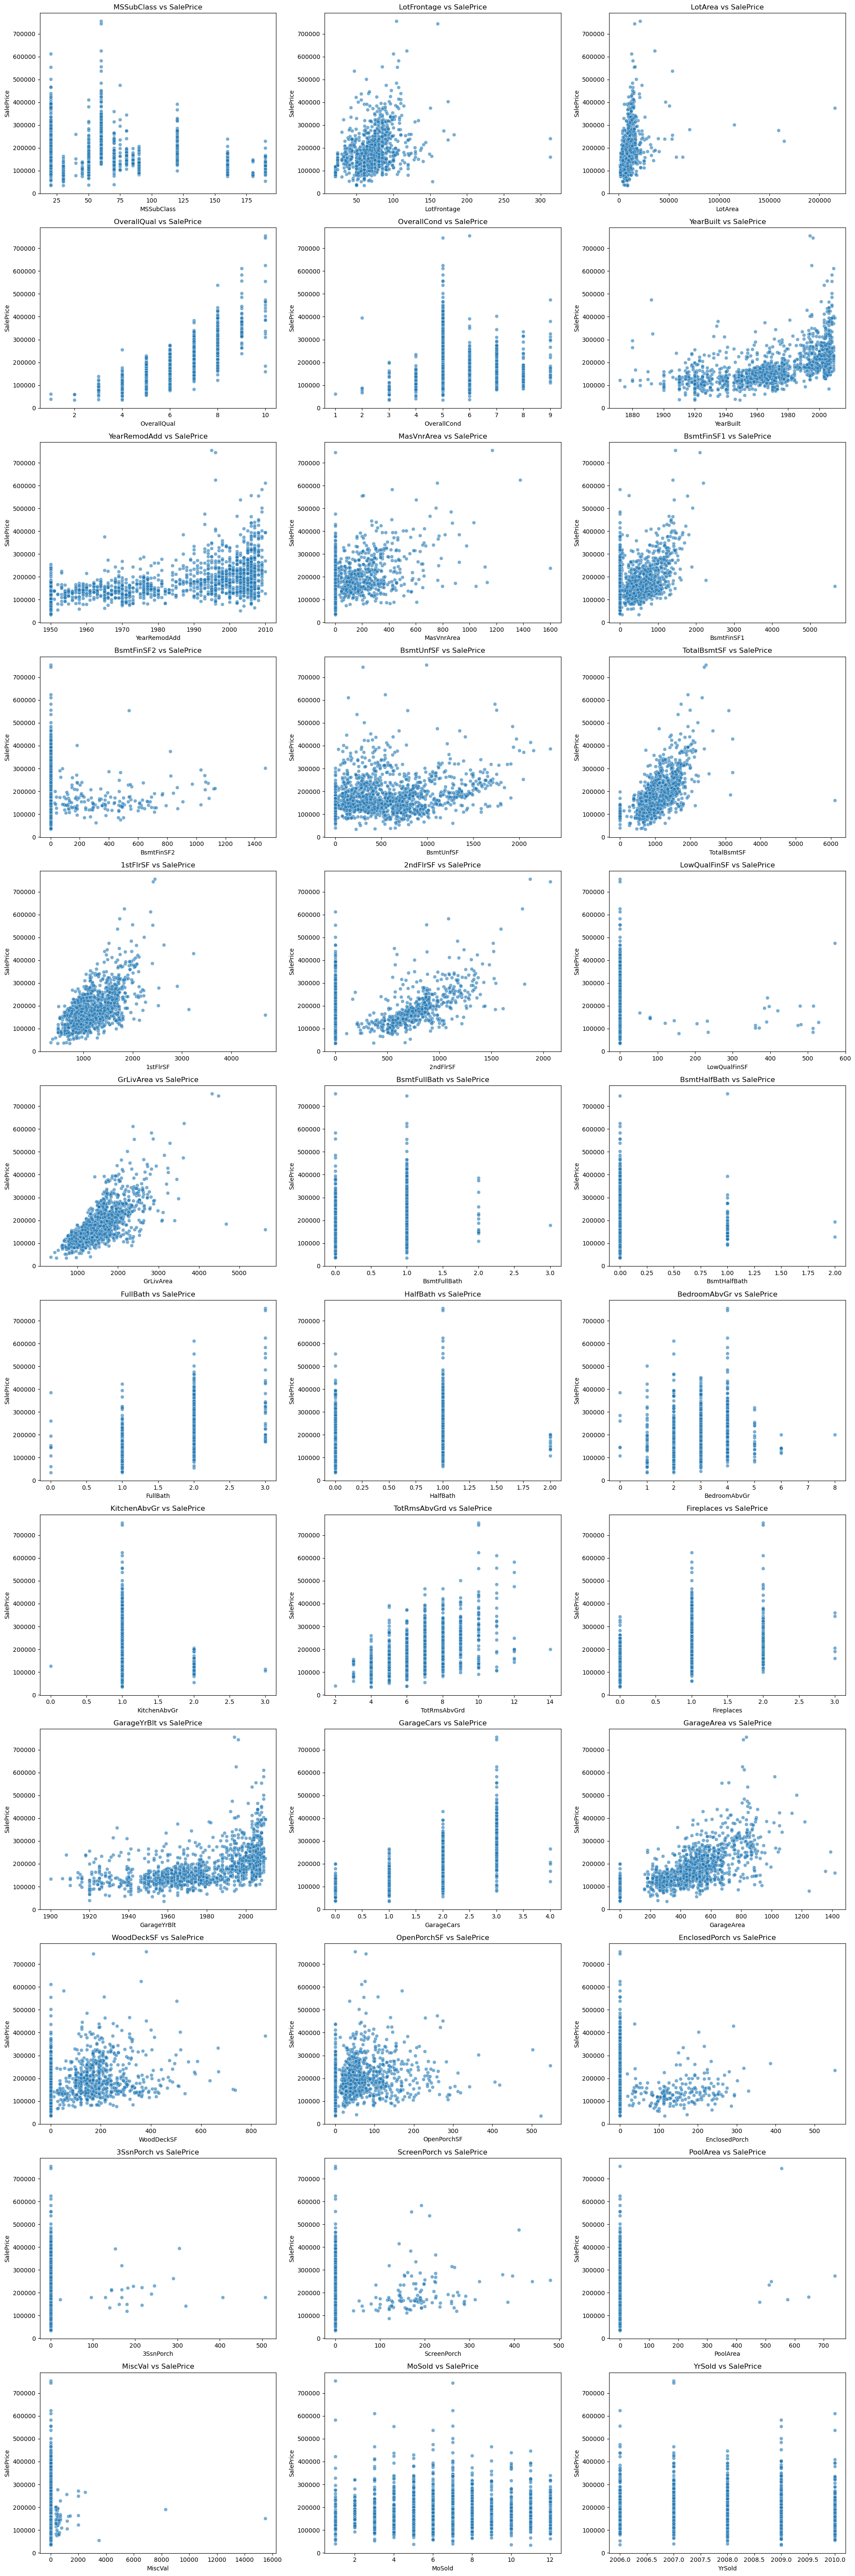

In [ ]:
# Scatter plots de las variables vs SalePrice
num_cols = df_train.select_dtypes(include=['number']).columns.drop('SalePrice')
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.scatterplot(x=df_train[col], y=df_train['SalePrice'], ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{col} vs SalePrice')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')
# Elimina los ejes vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **5. Valores Faltantes y Atípicos**

### **5.1. Valores faltantes**

In [ ]:
# Dataframe con la cantidad y porcentaje de valores faltantes por columna
null_sum = df_train.isnull().sum()
null_sum = null_sum[null_sum > 0].sort_values(ascending=False)

# Porcentaje de valores nulos por columna
null_percent = df_train.isnull().mean() * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
null_percent

missing_df = pd.DataFrame({
    'Valores Faltantes': null_sum,
    'Porcentaje': null_percent
})

# Ordenar valores de mayor a menor sin incluir aquellos con valor 0
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values(by='Valores Faltantes', ascending=False)
missing_df

Valores Faltantes  Porcentaje
PoolQC                     1453   99.520548
MiscFeature                1406   96.301370
Alley                      1369   93.767123
Fence                      1179   80.753425
MasVnrType                  872   59.726027
FireplaceQu                 690   47.260274
LotFrontage                 259   17.739726
GarageType                   81    5.547945
GarageYrBlt                  81    5.547945
GarageFinish                 81    5.547945
GarageQual                   81    5.547945
GarageCond                   81    5.547945
BsmtExposure                 38    2.602740
BsmtFinType2                 38    2.602740
BsmtQual                     37    2.534247
BsmtCond                     37    2.534247
BsmtFinType1                 37    2.534247
MasVnrArea                    8    0.547945
Electrical                    1    0.068493

### **5.2. Valores atípicos en variables principales**

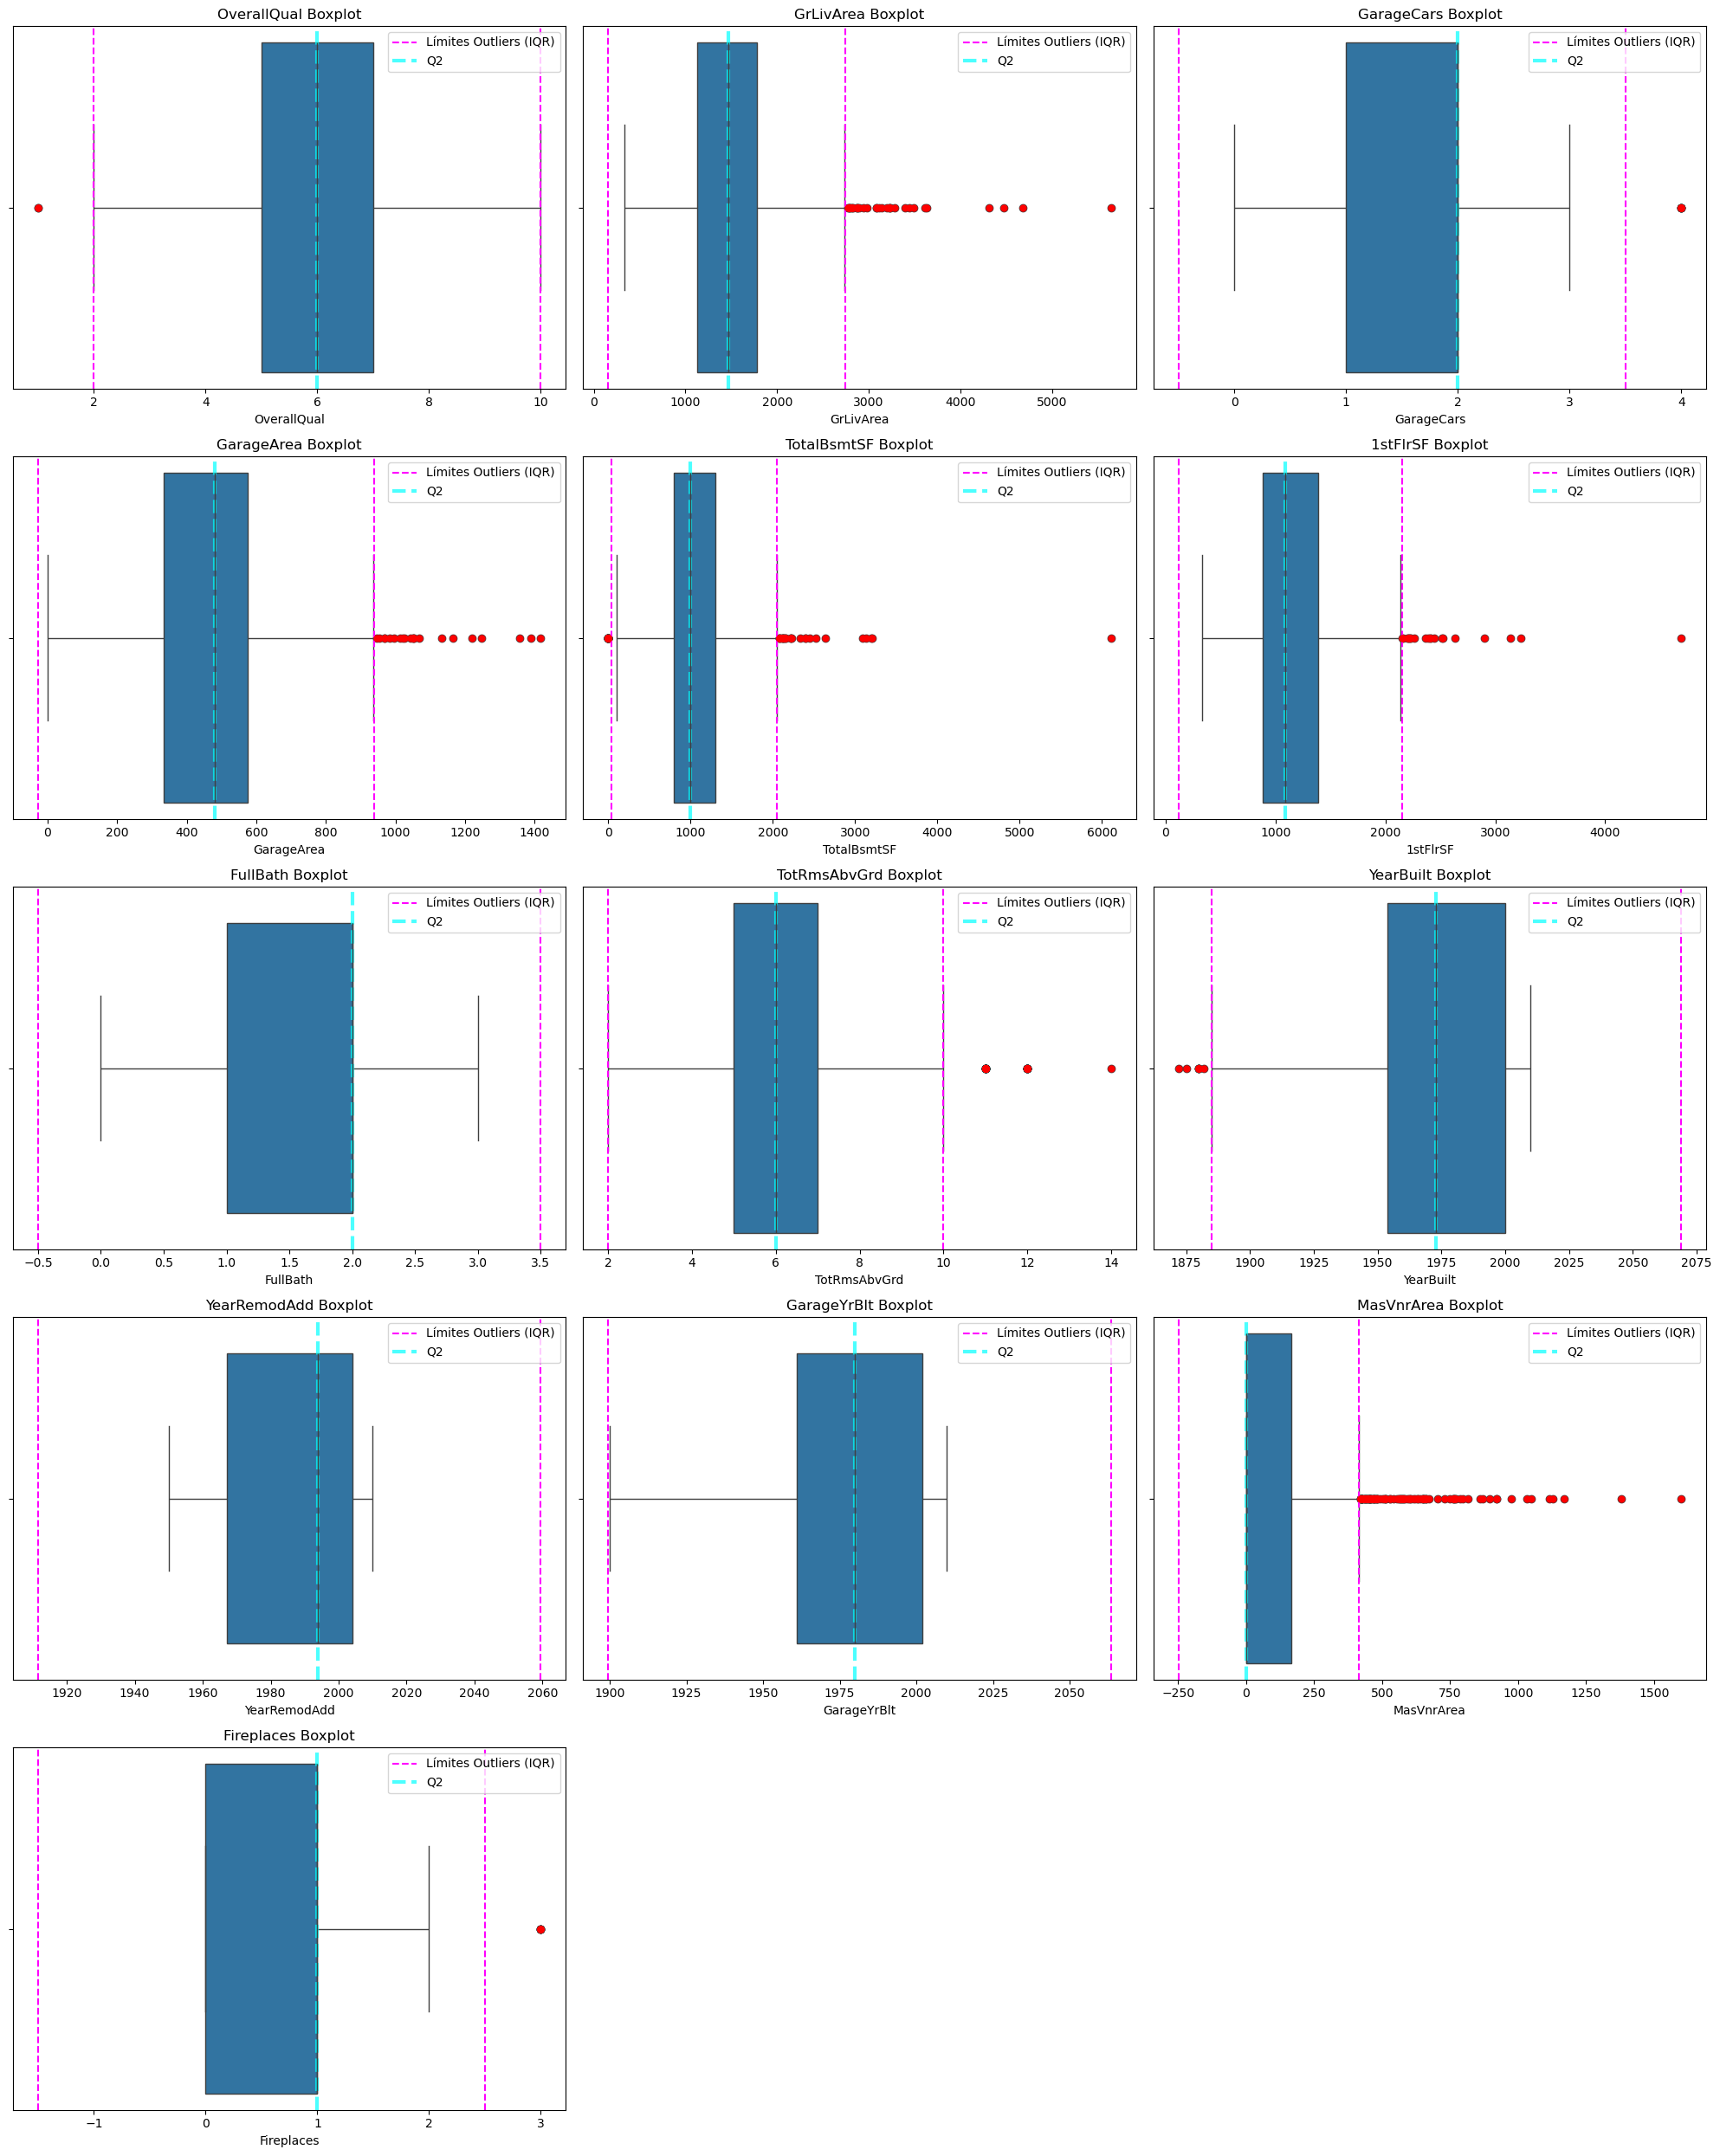

In [ ]:
# Boxplots de las variables top_corr con sus límites de outliers
num_cols = top_corr.index.tolist()
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_xlabel(col)

    # Deteccion de outliers usando el método IQR para cada variable numérica
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    axes[i].axvline(lower_bound, color='Magenta', linestyle='--')
    axes[i].axvline(upper_bound, color='Magenta', linestyle='--', label='Límites Outliers (IQR)')
    # Graficar línea de Q2
    Q2 = df_train[col].quantile(0.5)
    axes[i].axvline(Q2, color='Cyan', linestyle='--', label='Q2', linewidth=3, alpha=0.7)
    axes[i].legend()

    # Colorear los outliers
    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    for outlier in outliers[col]:
        axes[i].plot(outlier, 0, 'ro', markersize = 5) # Marca los outliers en rojo

# Elimina los ejes vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
# Dataframe con conteo y porcentaje de outliers en las variables top_corr
outliers_list = []

for col in top_corr.index:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    outliers_list.append({
        'Variable': col,
        'Correlación con SalePrice': top_corr[col],
        '# Outliers': outliers.shape[0],
        '% Outliers': (outliers.shape[0] / df_train.shape[0]) * 100
    })

outliers_count = pd.DataFrame(outliers_list)
outliers_count = outliers_count.sort_values(by='# Outliers', ascending=False)

outliers_count


Variable  Correlación con SalePrice  # Outliers  % Outliers
11    MasVnrArea                   0.477493          96    6.575342
4    TotalBsmtSF                   0.613581          61    4.178082
1      GrLivArea                   0.708624          31    2.123288
7   TotRmsAbvGrd                   0.533723          30    2.054795
3     GarageArea                   0.623431          21    1.438356
5       1stFlrSF                   0.605852          20    1.369863
8      YearBuilt                   0.522897           7    0.479452
12    Fireplaces                   0.466929           5    0.342466
2     GarageCars                   0.640409           5    0.342466
0    OverallQual                   0.790982           2    0.136986
6       FullBath                   0.560664           0    0.000000
10   GarageYrBlt                   0.486362           0    0.000000
9   YearRemodAdd                   0.507101           0    0.000000